# EDA Final Report

Import Required Packages

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr
import geopandas as gpd
import dataframe_image as dfi


## Data Wrangling

### PM2.5 Data

code originator: Ash, code reviewer: , code reviser: 

In [476]:
# Importing and concatenating yearly data sets
pm25_2015 = pd.read_csv("pm2.5_2015.csv")
pm25_2016 = pd.read_csv("pm2.5_2016.csv")
pm25_2017 = pd.read_csv("pm2.5_2017.csv")
pm25_2018 = pd.read_csv("pm2.5_2018.csv")
pm25_2019 = pd.read_csv("pm2.5_2019.csv")
pm25_2020 = pd.read_csv("pm2.5_2020.csv")
pm25_2021 = pd.read_csv("pm2.5_2021.csv")
pm25_2022 = pd.read_csv("pm2.5_2022.csv")
pm25_2023 = pd.read_csv("pm2.5_2023.csv")
pm25_2024 = pd.read_csv("pm2.5_2024.csv")

pm25_data = pd.concat([pm25_2015, pm25_2016, pm25_2017, pm25_2018, pm25_2019, pm25_2020, pm25_2021, pm25_2022, pm25_2023, pm25_2024], ignore_index=True)

Checking for Missing Values

In [477]:
pm25_data.isna().sum()

Date                                  0
Source                                0
Site ID                               0
POC                                   0
Daily Mean PM2.5 Concentration        0
Units                                 0
Daily AQI Value                       0
Local Site Name                    2287
Daily Obs Count                       0
Percent Complete                      0
AQS Parameter Code                    0
AQS Parameter Description             0
Method Code                       19451
Method Description                19451
CBSA Code                         40068
CBSA Name                         40068
State FIPS Code                       0
State                                 0
County FIPS Code                      0
County                                0
Site Latitude                         0
Site Longitude                        0
dtype: int64

Cleaning up data set

In [478]:
# Convert Date column to datetime and create columns for year and month
pm25_data["Date"] = pd.to_datetime(pm25_data["Date"])
pm25_data["Year"] = pm25_data["Date"].dt.year
pm25_data["Month"] = pm25_data["Date"].dt.month

# Only keeping relevant columns
pm25_data = pm25_data[["Date", "Daily AQI Value", "Site Latitude", "Site Longitude", "County", "Year", "Month"]]

# Reformatting column names: lowercase and replacing spaces with underscores
pm25_data.columns = pm25_data.columns.str.lower().str.replace(' ', '_')

Checking for outliers

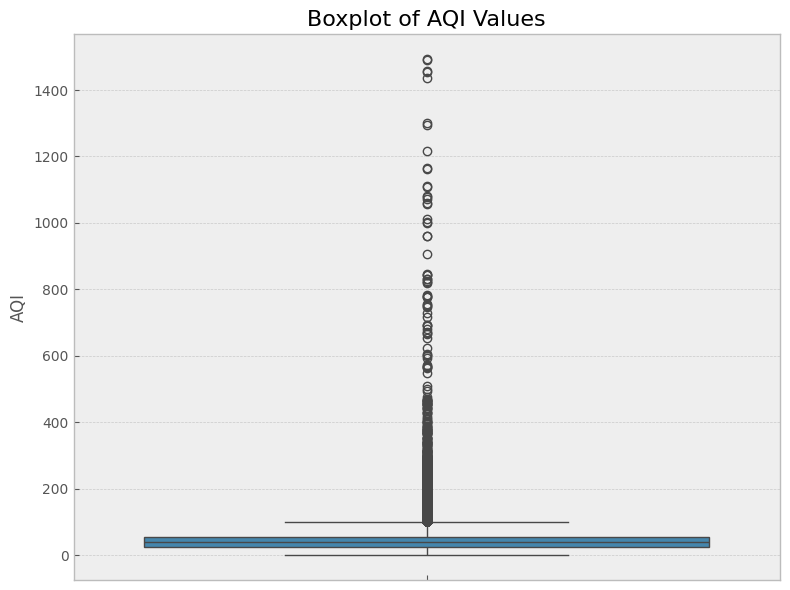

In [479]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=pm25_data['daily_aqi_value'])

# Customize the plot
plt.title('Boxplot of AQI Values', fontsize=16)
plt.ylabel('AQI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Remove rows with Daily AQI greater than 500

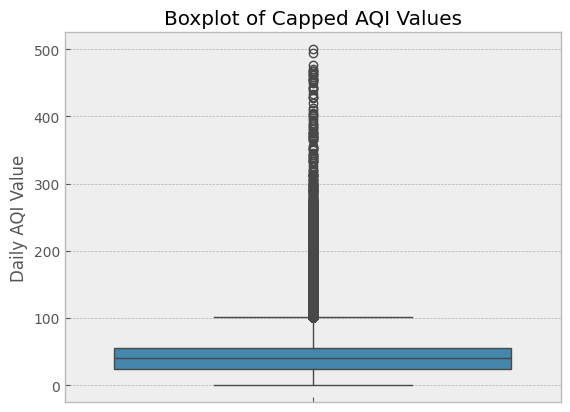

In [480]:
pm25_data = pm25_data.loc[pm25_data['daily_aqi_value'] <= 500]

# Plot a boxplot for the subset
sns.boxplot(y=pm25_data['daily_aqi_value'])
plt.title("Boxplot of Capped AQI Values")
plt.ylabel("Daily AQI Value")
plt.show()


Final PM2.5 Data Set

In [481]:
pm25_data.head()

,date,daily_aqi_value,site_latitude,site_longitude,county,year,month
0,2015-01-01,65,37.687526,-121.784217,Alameda,2015,1
1,2015-01-02,77,37.687526,-121.784217,Alameda,2015,1
2,2015-01-03,85,37.687526,-121.784217,Alameda,2015,1
3,2015-01-04,87,37.687526,-121.784217,Alameda,2015,1
4,2015-01-05,92,37.687526,-121.784217,Alameda,2015,1


In [439]:
dfi.export(pm25_data.head(), 'pm25_data.png')

### Car Data

code originator: Ash, code reviewer: , code reviser: 

In [46]:
car_data2015 = pd.read_csv("dmv2015.csv", encoding = 'UTF-16', sep="\t")
car_data2016 = pd.read_csv("dmv2016.csv", encoding = 'UTF-16', sep="\t")
car_data2017 = pd.read_csv("dmv2017.csv", encoding = 'UTF-16', sep="\t")
car_data2018 = pd.read_csv("dmv2018.csv", encoding = 'UTF-16', sep="\t")
car_data2019 = pd.read_csv("dmv2019.csv", encoding = 'UTF-16', sep="\t")
car_data2020 = pd.read_csv("dmv2020.csv", encoding = 'UTF-16', sep="\t")
car_data2021 = pd.read_csv("dmv2021.csv", encoding = 'UTF-16', sep="\t")
car_data2022 = pd.read_csv("dmv2022.csv", encoding = 'UTF-16', sep="\t")
car_data2023 = pd.read_csv("dmv2023.csv", encoding = 'UTF-16', sep="\t")

# List of dataframes and corresponding years
dataframes = [
    (car_data2015, 2015),
    (car_data2016, 2016),
    (car_data2017, 2017),
    (car_data2018, 2018),
    (car_data2019, 2019),
    (car_data2020, 2020),
    (car_data2021, 2021),
    (car_data2022, 2022),
    (car_data2023, 2023),
]

# Add a 'Year' column to each dataset
for df, year in dataframes:
    df['Year'] = year

# Concatenate all dataframes into a single dataset
car_data = pd.concat([df for df, _ in dataframes], ignore_index=True)

# Preview the combined dataset
car_data.head()


,Counties,Autos,Trucks,Trailers,Motorcycles,Total Vehicles,Year
0,ALAMEDA,"1,082,464","178,753","60,858","34,267","1,356,342",2015
1,ALPINE,"2,801","1,121",403,79,"4,404",2015
2,AMADOR,"28,445","15,123","10,688","2,134","56,390",2015
3,BUTTE,"125,799","53,422","45,407","7,530","232,158",2015
4,CALAVERAS,"36,866","19,681","15,579","2,950","75,076",2015


In [47]:
car_data.isna().sum()

Counties           0
Autos             18
Trucks            18
Trailers          18
Motorcycles       18
Total Vehicles     0
Year               0
dtype: int64

Cleaning up data set

In [48]:
# Reformat column names: lowercase and replacing spaces with underscores
car_data.columns = car_data.columns.str.lower().str.replace(' ', '_')

# Changing county names from all capital to title format
car_data['counties'] = car_data['counties'].str.title()

# Drop rows with NaN in the specified columns
car_data = car_data.dropna(subset=['autos', 'trucks', 'trailers', 'motorcycles', 'total_vehicles', 'year'])

# Convert to integers
for col in ['autos', 'trucks', 'trailers', 'motorcycles', 'total_vehicles', 'year']:
    car_data[col] = car_data[col].astype(str).str.replace(",", "").astype(int)

In [49]:
# Dropping rows without information on county
rows_to_drop = ['Out Of State', 'Misc Vehicles *', 'Fee Exempt Vehicles', 'Statewide', 'Irp Vehicles **']

car_data.drop(car_data[car_data['counties'].isin(rows_to_drop)].index, inplace=True)

Final Car Data Set

In [440]:
car_data.head()

,counties,autos,trucks,trailers,motorcycles,total_vehicles,year
0,Alameda,1082464,178753,60858,34267,1356342,2015
1,Alpine,2801,1121,403,79,4404,2015
2,Amador,28445,15123,10688,2134,56390,2015
3,Butte,125799,53422,45407,7530,232158,2015
4,Calaveras,36866,19681,15579,2950,75076,2015


In [441]:
dfi.export(car_data.head(), 'car_data.png')

### Population Data

code originator: Linxuan, code reviewer: Ash, code reviser: Ash

In [412]:
pop_data1 = pd.read_csv("E-4_2010-2020-Internet-Version.csv")
pop_data2 = pd.read_csv("E-4_2024_InternetVersion .csv")

Cleaning and merging the data sets

In [413]:
pop_data_2010_2020 = pop_data1.copy()

In [414]:
# Set the first row as the column header
pop_data_2010_2020.columns = pop_data_2010_2020.iloc[0]

# Drop the first row (now redundant since it's the header)
pop_data_2010_2020 = pop_data_2010_2020.drop(0)

# Remove the last three columns
pop_data_2010_2020 = pop_data_2010_2020.iloc[:, :-3]

# Rename columns to keep the last four characters
new_columns = [col_name[-4:] for col_name in pop_data_2010_2020.columns[1:]]
new_columns = [pop_data_2010_2020.columns[0]] + new_columns

pop_data_2010_2020.columns = new_columns

pop_data_2010_2020_ = pop_data_2010_2020.transpose()

# Reformat columns
pop_data_2010_2020.columns = pop_data_2010_2020.columns.str.lower().str.replace(' ', '_')

pop_data_2010_2020.head()


,county,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2020
1,Alameda,"1,510,271","1,527,169","1,549,193","1,575,139","1,597,747","1,622,205","1,641,983","1,656,919","1,666,247","1,675,964","1,681,337","1,682,353"
2,Alpine,"1,175","1,174","1,176","1,180","1,185","1,190","1,196","1,201","1,205","1,201","1,204","1,204"
3,Amador,"38,091","37,089","37,272","37,044","37,089","37,453","37,663","38,807","39,708","40,227","40,426","40,474"
4,Butte,"220,000","221,377","222,623","224,391","225,737","227,400","228,198","230,412","231,774","227,263","216,090","211,632"
5,Calaveras,"45,578","45,561","45,544","45,499","45,461","45,395","45,402","45,355","45,367","45,324","45,290","45,292"


In [415]:
# Remove redundant column
pop_data_2010_2020 = pop_data_2010_2020.iloc[:, :-1]

In [416]:
pop_data_2021_2024 = pop_data2.copy()

In [417]:
# Set the first row as the column header
pop_data_2021_2024.columns = pop_data_2021_2024.iloc[1]

# Drop the first row (now redundant since it's the header)
pop_data_2021_2024 = pop_data_2021_2024.drop([0, 1])

# Convert column names to string before slicing
pop_data_2021_2024.columns = pop_data_2021_2024.columns.astype(str)

# Rename columns to keep the last four characters
new_columns = [col_name[-4:] for col_name in pop_data_2021_2024.columns[1:]]
new_columns = [pop_data_2021_2024.columns[0]] + new_columns

pop_data_2021_2024.columns = new_columns

# Reformat columns
pop_data_2021_2024.columns = pop_data_2021_2024.columns.str.lower().str.replace(' ', '_')

pop_data_2021_2024.head()

,county,2020,2021,2022,2023,2024
2,Alameda,"1,682,353","1,666,341","1,643,683","1,650,656","1,641,869"
3,Alpine,"1,204","1,195","1,190","1,183","1,179"
4,Amador,"40,474","40,047","40,010","39,924","39,611"
5,Butte,"211,632","207,403","206,184","206,579","205,928"
6,Calaveras,"45,292","45,259","45,021","44,899","44,842"


In [418]:
pop_data_2021_2024 = pop_data_2021_2024.drop(pop_data_2021_2024.columns[1], axis=1)

In [419]:
# Merge data sets together
merged_pop_data = pd.merge(pop_data_2010_2020, pop_data_2021_2024, on='county', how='outer')
merged_pop_data.head()

,county,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Alameda,"1,510,271","1,527,169","1,549,193","1,575,139","1,597,747","1,622,205","1,641,983","1,656,919","1,666,247","1,675,964","1,681,337","1,666,341","1,643,683","1,650,656","1,641,869"
1,Alpine,"1,175","1,174","1,176","1,180","1,185","1,190","1,196","1,201","1,205","1,201","1,204","1,195","1,190","1,183","1,179"
2,Amador,"38,091","37,089","37,272","37,044","37,089","37,453","37,663","38,807","39,708","40,227","40,426","40,047","40,010","39,924","39,611"
3,Butte,"220,000","221,377","222,623","224,391","225,737","227,400","228,198","230,412","231,774","227,263","216,090","207,403","206,184","206,579","205,928"
4,Calaveras,"45,578","45,561","45,544","45,499","45,461","45,395","45,402","45,355","45,367","45,324","45,290","45,259","45,021","44,899","44,842"


Identifying and dropping missing values in final merged data set

In [420]:
merged_pop_data.isna().sum()

county    16
2010      16
2011      16
2012      16
2013      16
2014      16
2015      16
2016      16
2017      16
2018      16
2019      16
2020      16
2021      16
2022      16
2023      16
2024      16
dtype: int64

In [421]:
merged_pop_data.dropna(inplace=True)
merged_pop_data.shape

(59, 16)

Final Data Set

In [422]:
merged_pop_data.head()

,county,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Alameda,"1,510,271","1,527,169","1,549,193","1,575,139","1,597,747","1,622,205","1,641,983","1,656,919","1,666,247","1,675,964","1,681,337","1,666,341","1,643,683","1,650,656","1,641,869"
1,Alpine,"1,175","1,174","1,176","1,180","1,185","1,190","1,196","1,201","1,205","1,201","1,204","1,195","1,190","1,183","1,179"
2,Amador,"38,091","37,089","37,272","37,044","37,089","37,453","37,663","38,807","39,708","40,227","40,426","40,047","40,010","39,924","39,611"
3,Butte,"220,000","221,377","222,623","224,391","225,737","227,400","228,198","230,412","231,774","227,263","216,090","207,403","206,184","206,579","205,928"
4,Calaveras,"45,578","45,561","45,544","45,499","45,461","45,395","45,402","45,355","45,367","45,324","45,290","45,259","45,021","44,899","44,842"


In [442]:
dfi.export(merged_pop_data.head(), 'merged_pop_data.png')

### Gas Data

code originator: Echo, code reviewer: Ash, code reviser: Ash

In [270]:
gas_data = pd.read_csv('GasByUtility.csv')
gas_data.head()

,Utility Type,Utility Name,Year,Ag & Water Pump,Commercial Building,Commercial Other,Industry,Mining & Construction,Residential,Total Usage
0,Investor owned utility,Pacific Gas and Electric Company,2015,34.473832,826.852780,52.868346,1758.804407,56.187360,1689.915151,4419.101876
1,Investor owned utility,Pacific Gas and Electric Company,2016,36.082045,857.762753,56.610838,1801.415004,69.707912,1745.544184,4567.122736
2,Investor owned utility,Pacific Gas and Electric Company,2017,36.367355,890.886204,59.003319,1683.825192,170.815491,1873.367168,4714.264729
3,Investor owned utility,Pacific Gas and Electric Company,2018,37.242809,899.093619,59.023642,1773.534151,190.215910,1832.781258,4791.891389
4,Investor owned utility,Pacific Gas and Electric Company,2019,34.322199,925.932501,61.558841,1845.786283,169.629088,1902.790915,4940.019827


Checking for missing values

In [271]:
gas_data.isna().sum()

Utility Type             0
Utility Name             0
Year                     0
Ag & Water Pump          0
Commercial Building      0
Commercial Other         0
Industry                 0
Mining & Construction    0
Residential              0
Total Usage              0
dtype: int64

Cleaning up data set

In [272]:
# Keeping relevant columns
gas_data = gas_data[["Year", "Total Usage"]]

# Reformat column names: lowercase and replacing spaces with underscores
gas_data.columns = gas_data.columns.str.lower().str.replace(' ', '_')


Final Gas Data Set

In [443]:
gas_data.head()

,year,total_usage
0,2015,4419.101876
1,2016,4567.122736
2,2017,4714.264729
3,2018,4791.891389
4,2019,4940.019827


In [444]:
dfi.export(gas_data.head(), 'gas_data.png')

### Electricity Data

code originator: Echo, code reviewer: Ash, code reviser: Ash

In [446]:
electricity_data = pd.read_csv('ElectricityByUtility.csv')
electricity_data.head()

,Utility Type,Utility Name,Year,Ag & Water Pump,Commercial Building,Commercial Other,Industry,Mining & Construction,Residential,Streetlight,Total Usage
0,Investor owned utility,Bear Valley Electric Service,2015,0.000000,50.037724,0.0,0.0,0.0,77.765492,0.195363,127.998579
1,Investor owned utility,Bear Valley Electric Service,2016,0.000000,46.388970,0.0,0.0,0.0,75.896265,0.192438,122.477673
2,Investor owned utility,Bear Valley Electric Service,2017,0.000000,44.630446,0.0,0.0,0.0,75.680675,0.192407,120.503528
3,Investor owned utility,Bear Valley Electric Service,2018,0.278864,45.044731,0.0,0.0,0.0,75.619148,0.191879,121.134622
4,Investor owned utility,Bear Valley Electric Service,2019,0.003800,52.709264,0.0,0.0,0.0,78.464967,0.193989,131.372020


Checking for missing values

In [447]:
electricity_data.isna().sum()

Utility Type             0
Utility Name             0
Year                     0
Ag & Water Pump          0
Commercial Building      0
Commercial Other         0
Industry                 0
Mining & Construction    0
Residential              0
Streetlight              0
Total Usage              0
dtype: int64

Cleaning up data set

In [448]:
# Keeping relevant columns
electricity_data = electricity_data[["Year", "Total Usage"]]

# Reformat column names: lowercase and replacing spaces with underscores
electricity_data.columns = electricity_data.columns.str.lower().str.replace(' ', '_')

Final Electricity Data Set

In [449]:
electricity_data.head()

,year,total_usage
0,2015,127.998579
1,2016,122.477673
2,2017,120.503528
3,2018,121.134622
4,2019,131.372020


In [450]:
dfi.export(electricity_data.head(), 'electricity_data.png')

## Figures

### Monthly Average PM2.5 AQI Over Time

code originator: Ash, code reviewer:, code reviser: 

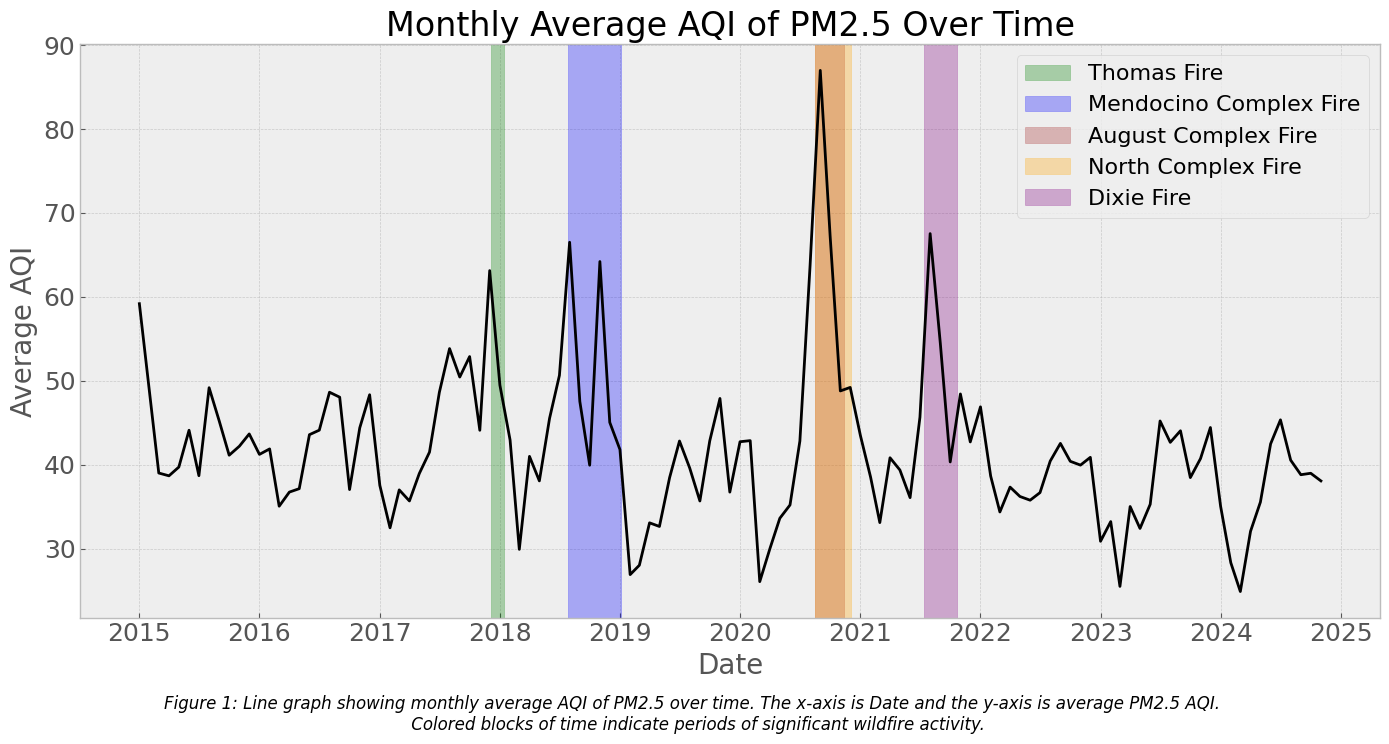

In [483]:
# Prepare the PM2.5 data (using Daily Mean PM2.5 Concentration)
pm25_data['date'] = pd.to_datetime(pm25_data['date'])
pm25_data['yearmonth'] = pm25_data['date'].dt.to_period('M')
pm25_monthly_avg = pm25_data.groupby('yearmonth')['daily_aqi_value'].mean().reset_index()
pm25_monthly_avg['yearmonth'] = pm25_monthly_avg['yearmonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(pm25_monthly_avg["yearmonth"], pm25_monthly_avg['daily_aqi_value'], color="black")

# Add shaded blocks
plt.axvspan('2017-12-04', '2018-01-12', color='green', alpha=0.3, label='Thomas Fire')
plt.axvspan('2018-07-27', '2019-01-04', color='blue', alpha=0.3, label='Mendocino Complex Fire')
plt.axvspan('2020-08-16', '2020-11-12', color='brown', alpha=0.3, label='August Complex Fire')
plt.axvspan('2020-08-17', '2020-12-03', color='orange', alpha=0.3, label='North Complex Fire')
plt.axvspan('2021-07-13', '2021-10-21', color='purple', alpha=0.3, label='Dixie Fire')

# Customize the plot
plt.title('Monthly Average AQI of PM2.5 Over Time', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Average AQI', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the legend
plt.legend(fontsize=16)

plt.figtext(
    0.5, -0.05,
    "Figure 1: Line graph showing monthly average AQI of PM2.5 over time. The x-axis is Date and the y-axis is average PM2.5 AQI. \n Colored blocks of time indicate periods of significant wildfire activity.", 
    ha='center',
    fontsize=12,
    style='italic'
)

# Show the plot
plt.savefig("avg_pm25_time_series.png", bbox_inches='tight')
plt.show()


### Monthly Average PM2.5 AQI by County by Year

code originator: Ash, code reviewer:, code reviser: 

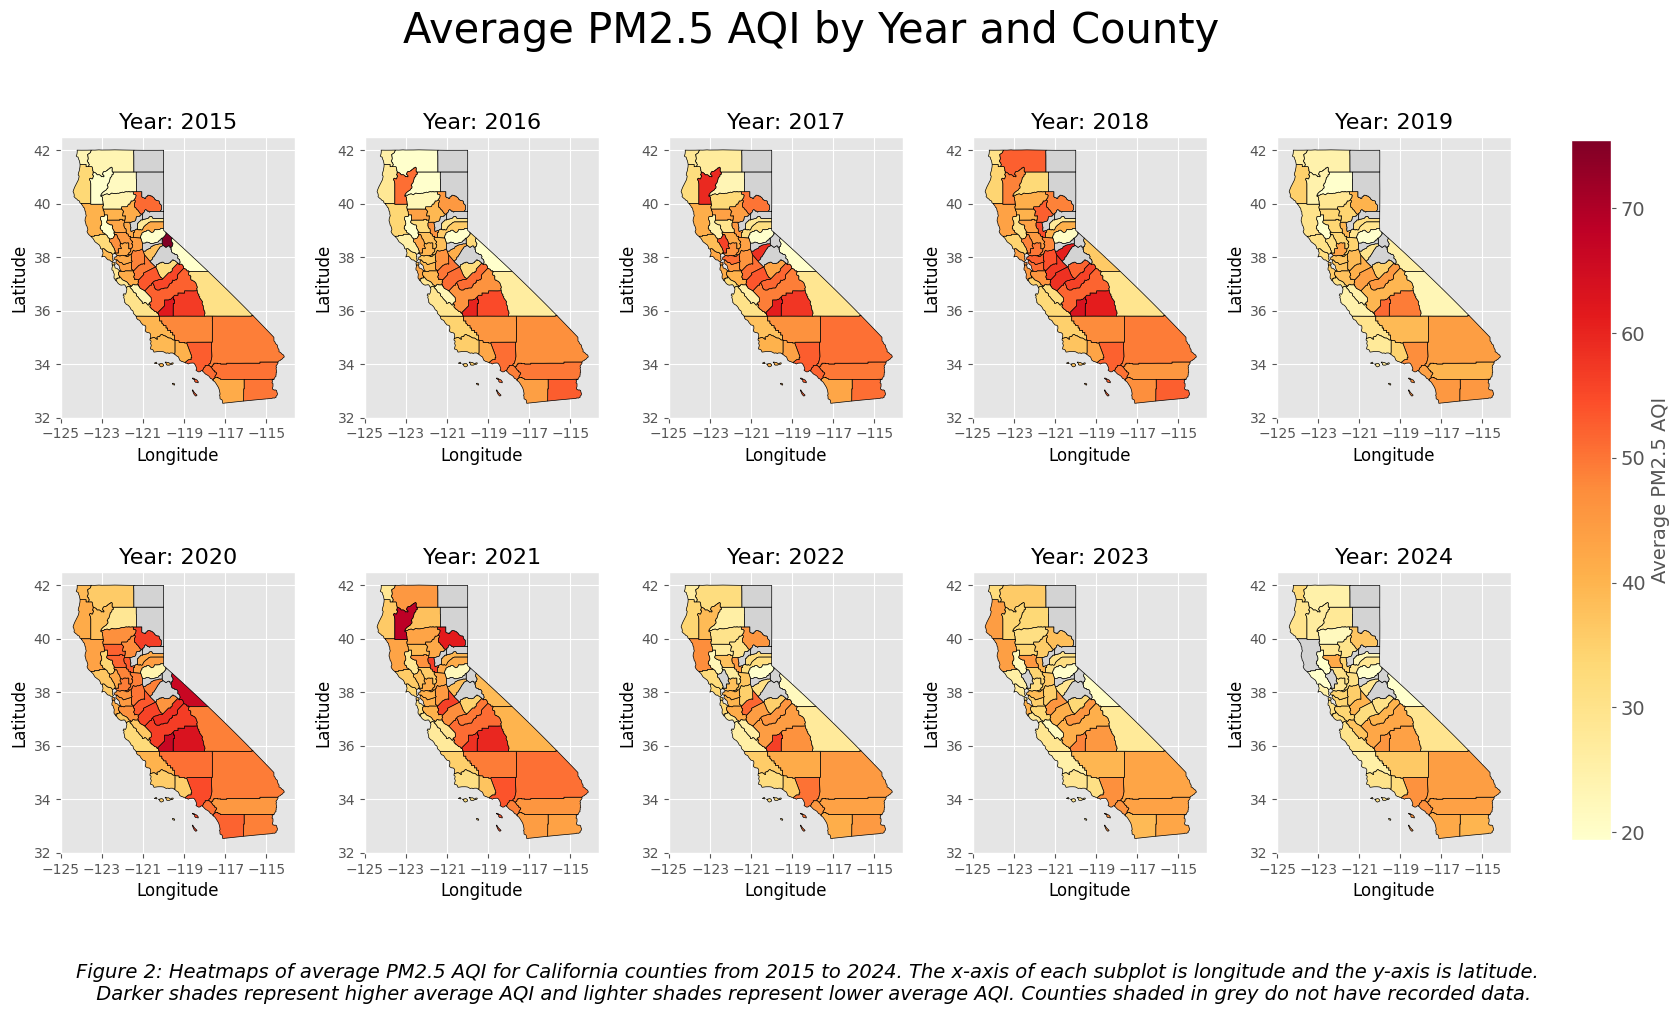

In [369]:
# Define the tick intervals for longitude and latitude
x_ticks = np.arange(-125, -114, 2)  # Adjust the range and interval as per California's extent
y_ticks = np.arange(32, 43, 2)      # Adjust the range and interval as per California's extent

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust vertical (hspace) and horizontal (wspace) spacing

axes = axes.flatten()

california_geojson = gpd.read_file("california-counties_780.geojson")

vmin = pm25_data.groupby('county')['daily_aqi_value'].mean().min()  # Minimum average AQI value
vmax = pm25_data.groupby('county')['daily_aqi_value'].mean().max()  # Maximum average AQI value

unique_years = pm25_data['year'].unique()
unique_years.sort()  # Sort the years to ensure chronological order

for i, year in enumerate(unique_years):
    # Filter data for the specific year
    yearly_data = pm25_data[pm25_data['year'] == year]
    county_aqi_year = yearly_data.groupby('county')['daily_aqi_value'].mean().reset_index()
    county_aqi_year.columns = ['NAME', 'Average_AQI']  # Match GeoJSON column
    
    # Merge GeoJSON with AQI data
    merged_geo = california_geojson.merge(county_aqi_year, on='NAME', how='left')
    
    # Plot heatmap for the year
    ax = axes[i]
    merged_geo.plot(
        column='Average_AQI',
        cmap='YlOrRd',
        legend=False,  # Suppress individual legends
        edgecolor='black',
        linewidth=0.5,
        vmin=vmin,  # Apply consistent vmin
        vmax=vmax,  # Apply consistent vmax
        ax=ax,
        missing_kwds={"color": "lightgrey", "label": "No Data"}
    )
    ax.set_title(f'Year: {year}', fontsize=16)
    ax.set_xticks(x_ticks)  # Set evenly spaced longitude ticks
    ax.set_yticks(y_ticks)  # Set evenly spaced latitude ticks
    ax.set_xlabel('Longitude', color = 'black', fontsize=12)
    ax.set_ylabel('Latitude', color = 'black', fontsize=12)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to leave space for the color bar
fig.subplots_adjust(right=0.85)  # Shrinks the grid to leave space for the color bar

# Add a single colorbar outside the grid
cax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # Adjust position to the right of the plots
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Dummy array for the colorbar

# Add colorbar with custom label and tick sizes
colorbar = fig.colorbar(sm, cax=cax, label='Average PM2.5 AQI')
colorbar.ax.tick_params(labelsize=14)  # Adjust tick font size
colorbar.set_label('Average PM2.5 AQI', fontsize=14)  # Adjust label font size

plt.figtext(
    0.5, -0.01,
    "Figure 2: Heatmaps of average PM2.5 AQI for California counties from 2015 to 2024. The x-axis of each subplot is longitude and the y-axis is latitude. \n Darker shades represent higher average AQI and lighter shades represent lower average AQI. Counties shaded in grey do not have recorded data.", 
    ha='center',
    fontsize=14,
    style='italic'
)

plt.suptitle('Average PM2.5 AQI by Year and County', fontsize=30)
plt.savefig("aqi_heatmap_by_year.png", bbox_inches='tight')
plt.show()


### Bar plot of average number of vehicles registered per capita by county

code originator: Linxuan, code reviewer: Ash, code reviser: Ash

In [468]:
avg_total_vehicles = (
    car_data.groupby('counties')['total_vehicles'].mean().sort_values(ascending=True)
)
pop_data = merged_pop_data.copy()

In [469]:
pop_data['county'] = pop_data['county'].str.strip()

for year in range(2015, 2024):
    pop_data[str(year)] = pop_data[str(year)].str.replace(',', '').str.replace(' ', '').astype(float)


cols_to_average = [str(year) for year in range(2015, 2024)]
pop_data['average_population'] = pop_data[cols_to_average].mean(axis=1)


average_population = pop_data[['county', 'average_population']].sort_values('average_population', ascending=False)

average_population = average_population[average_population['county'] != 'State Total']
average_population = average_population.rename(columns={'county': 'counties'})
average_population.head()

,counties,average_population
18,Los Angeles,1.001204e+07
36,San Diego,3.282381e+06
29,Orange,3.171529e+06
32,Riverside,2.382403e+06
35,San Bernardino,2.157262e+06


In [457]:
avg_total_vehicles

counties
Alpine         3.103111e+03
Sierra         5.739889e+03
Modoc          1.376311e+04
Mono           1.754333e+04
Trinity        1.974311e+04
                   ...     
Riverside      2.080377e+06
Orange         2.885733e+06
San Diego      2.988168e+06
Los Angeles    7.969642e+06
Statewide      3.561584e+07
Name: total_vehicles, Length: 61, dtype: float64

In [470]:
# Find counties present in avg_total_vehicles but not in average_population
diff1 = set(avg_total_vehicles.index) - set(average_population['counties'])
print("Counties in avg_total_vehicles but not in average_population:")
print(diff1)

# Find counties present in average_population but not in avg_total_vehicles
diff2 = set(average_population['counties']) - set(avg_total_vehicles.index)
print("\nCounties in average_population but not in avg_total_vehicles:")
diff2

Counties in avg_total_vehicles but not in average_population:
{'Fee Exempt Vehicles', 'Statewide', 'Out Of State'}

Counties in average_population but not in avg_total_vehicles:


set()

In [471]:
# Merge the two dataframes based on the 'counties' column
vehical_info_df = pd.merge(avg_total_vehicles.reset_index(), average_population, on='counties', how='inner')

# Calculate the new column
vehical_info_df['avg_vehicles'] = vehical_info_df['total_vehicles'] / vehical_info_df['average_population']

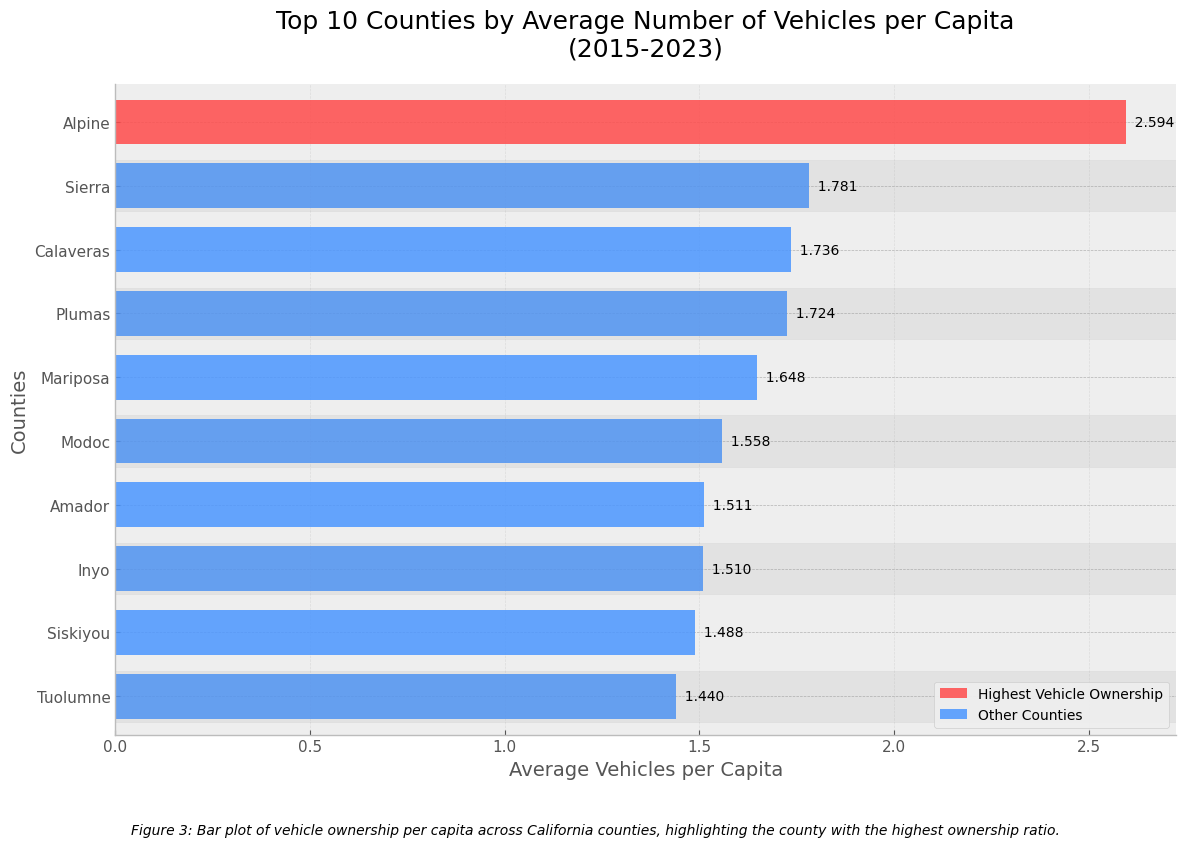

In [473]:
# Set figure size and style
plt.style.use('bmh')
plt.figure(figsize=(12, 8))

# Calculate per capita vehicle ownership for each county
county_vehicle_ownership = (
    vehical_info_df.groupby('counties')['avg_vehicles'].mean().sort_values(ascending=True)
).tail(10)  # Select top 10 counties

# Identify the county with highest vehicle ownership
highest_ownership_county = county_vehicle_ownership.index[-1]

# Define colors for visualization
HIGHLIGHT_COLOR = '#FF4B4B'  # Red for highest value
BASE_COLOR = '#4B96FF'      # Blue for other values

# Create color mapping for bars
bar_color_mapping = [
    HIGHLIGHT_COLOR if county == highest_ownership_county else BASE_COLOR 
    for county in county_vehicle_ownership.index
]

# Create the horizontal bar plot
plot_axis = county_vehicle_ownership.plot(
    kind='barh', 
    color=bar_color_mapping, 
    alpha=0.85, 
    width=0.7
)

# Set plot titles and labels
plt.title('Top 10 Counties by Average Number of Vehicles per Capita\n(2015-2023)', 
         fontsize=18, pad=20)
plt.xlabel('Average Vehicles per Capita', fontsize=14)
plt.ylabel('Counties', fontsize=14)

# Add value labels on bars
for index, value in enumerate(county_vehicle_ownership):
    plot_axis.text(value, index, f'  {value:.3f}', 
                  va='center', fontsize=10)

# Customize grid appearance
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Set tick parameters
plt.tick_params(axis='both', which='major', labelsize=11)

# Create and add legend
from matplotlib.patches import Patch
legend_items = [
    Patch(facecolor=HIGHLIGHT_COLOR, alpha=0.85, label='Highest Vehicle Ownership'),
    Patch(facecolor=BASE_COLOR, alpha=0.85, label='Other Counties')
]
plt.legend(handles=legend_items, loc='lower right', 
          fontsize=10, framealpha=0.95)

# Adjust layout
plt.tight_layout()

# Add descriptive caption
plt.figtext(
    0.5, -0.05,
    "Figure 3: Bar plot of vehicle ownership per capita across California counties, "
    "highlighting the county with the highest ownership ratio.",
    ha='center',
    fontsize=10,
    style='italic'
)

# Customize plot appearance
for spine in ['top', 'right']:
    plot_axis.spines[spine].set_visible(False)

# Add alternating row backgrounds
for row_index in range(len(county_vehicle_ownership)):
    if row_index % 2 == 0:
        plot_axis.axhspan(row_index-0.4, row_index+0.4, color='gray', alpha=0.1)

# Save and display the plot
plt.savefig("vehicle_ownership_analysis.png", bbox_inches='tight', dpi=300)
plt.show()

### Scatter plot of PM2.5 concentration vs average number of registered vehicles

code originator: Ash, code reviewer:, code reviser: 

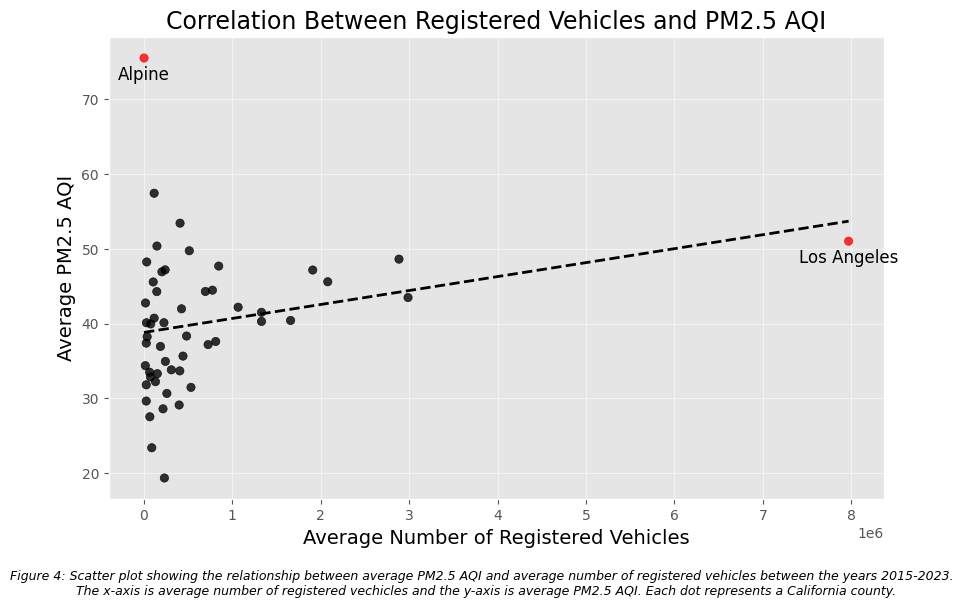

In [368]:
# Clean and aggregate PM2.5 data by county
pm25_by_county = pm25_data.groupby('county')['daily_aqi_value'].mean().reset_index()
pm25_by_county.columns = ['County', 'Average PM2.5']

# Clean and aggregate vehicle data by county
vehicle_by_county = car_data.groupby('counties')['total_vehicles'].mean().reset_index()
vehicle_by_county.columns = ['County', 'Average Vehicles']

# Merge datasets on county names
merged_data = pd.merge(vehicle_by_county, pm25_by_county, on='County', how='inner')

# Define a color list based on county names
colors = [
    'red' if county in ['Alpine', 'Los Angeles'] else 'black'
    for county in merged_data['County']
]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_data['Average Vehicles'],
    merged_data['Average PM2.5'],
    c=colors,
    alpha=0.8,
)

# Add annotations for Alpine and Los Angeles
for i, row in merged_data.iterrows():
    if row['County'] in ['Alpine', 'Los Angeles']:
        plt.text(
            row['Average Vehicles'],
            row['Average PM2.5'] - 1.0,
            row['County'],
            fontsize=12,
            color='black',
            ha='center',  # Horizontal alignment
            va='top'  # Vertical alignment
        )

# Add regression line
sns.regplot(
    x='Average Vehicles',
    y='Average PM2.5',
    data=merged_data,
    scatter=False,  # Disable default scatterplot
    color="black",
    line_kws={"linewidth": 2, "linestyle": "--"},
    ci=None
)

# Customize the plot
plt.title("Correlation Between Registered Vehicles and PM2.5 AQI", fontsize=17)
plt.xlabel('Average Number of Registered Vehicles', fontsize=14, color="black")
plt.ylabel('Average PM2.5 AQI', fontsize=14, color="black")
plt.grid(alpha=0.5)

plt.figtext(
    0.5, -0.05,
    "Figure 4: Scatter plot showing the relationship between average PM2.5 AQI and average number of registered vehicles between the years 2015-2023. \n The x-axis is average number of registered vechicles and the y-axis is average PM2.5 AQI. Each dot represents a California county.", 
    ha='center',
    fontsize=9,
    style='italic'
)

# Save and show the plot
plt.savefig("car_pm25_scatterplot.png", bbox_inches='tight')
plt.show()




Yearly Gas Consumption vs Average PM2.5 Levels 

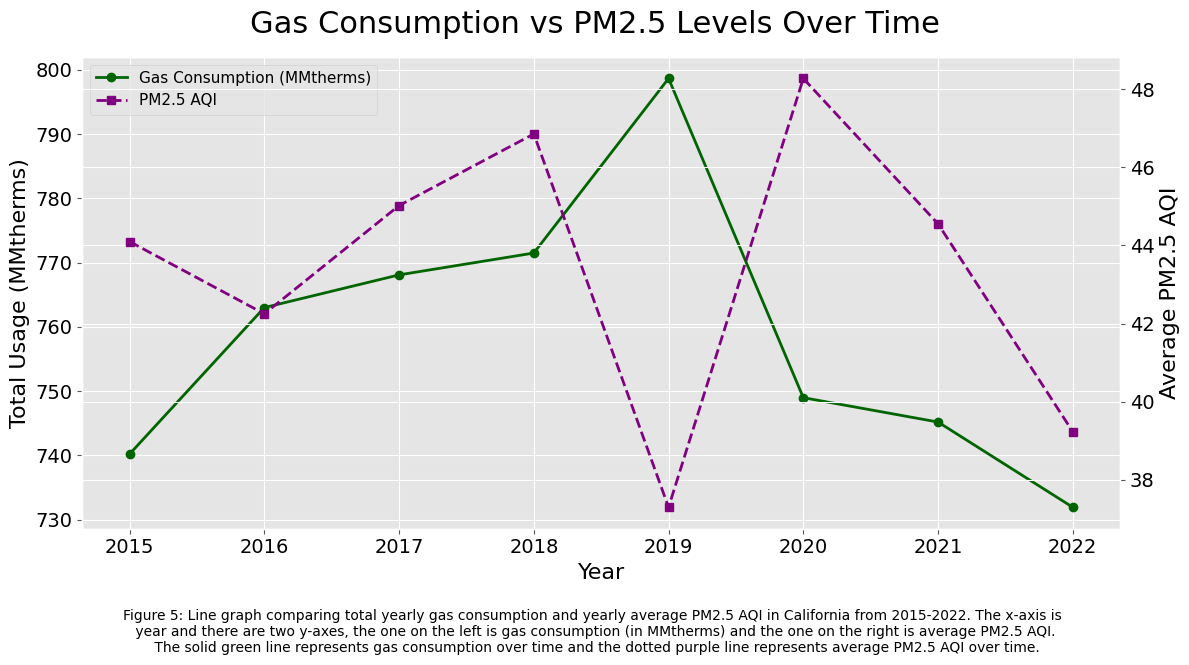

In [364]:
gas_aggregated = gas_data.groupby('year', as_index=False).agg({'total_usage': 'mean'})

# Aggregate PM2.5 data by year (mean values for PM2.5 AQI)
pm25_aggregated = pm25_data.groupby('year', as_index=False).agg({'daily_aqi_value': 'mean'})

# Merge datasets on 'year' column
merged_data = pd.merge(pm25_aggregated, gas_aggregated, on='year', how='left')

merged_data = merged_data[~merged_data['year'].isin([2023, 2024])]

# Use a valid style for better aesthetics
plt.style.use('ggplot') 
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot electricity consumption
line1 = ax1.plot(
    merged_data['year'],
    merged_data['total_usage'],
    color='darkgreen',
    linewidth=2,
    marker='o',
    label='Gas Consumption (MMtherms)'
)
ax1.set_xlabel('Year', color='black', fontsize=16)
ax1.set_ylabel('Total Usage (MMtherms)', color='black', fontsize=16)
ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
ax1.tick_params(axis='x', labelcolor='black', labelsize=14)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot PM2.5 levels
line2 = ax2.plot(
    merged_data['year'],
    merged_data['daily_aqi_value'],
    color='purple',
    linewidth=2,
    linestyle='--',
    marker='s',
    label='PM2.5 AQI'
)
ax2.set_ylabel('Average PM2.5 AQI', color='black', fontsize=16)
ax2.tick_params(axis='y', labelcolor='black', labelsize=14)

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11)

# Add title
fig.suptitle('Gas Consumption vs PM2.5 Levels Over Time', fontsize=22)
fig.tight_layout()

# Add a caption below the plot
plt.figtext(
    0.5, -0.09,
    "Figure 5: Line graph comparing total yearly gas consumption and yearly average PM2.5 AQI in California from 2015-2022. The x-axis is \n year and there are two y-axes, the one on the left is gas consumption (in MMtherms) and the one on the right is average PM2.5 AQI. \n The solid green line represents gas consumption over time and the dotted purple line represents average PM2.5 AQI over time.", 
    ha='center',
    fontsize=10
)

plt.savefig("gas_vs_pm25.png", bbox_inches='tight')
plt.show()


Yearly Electricity Consumption vs Average PM2.5 Levels

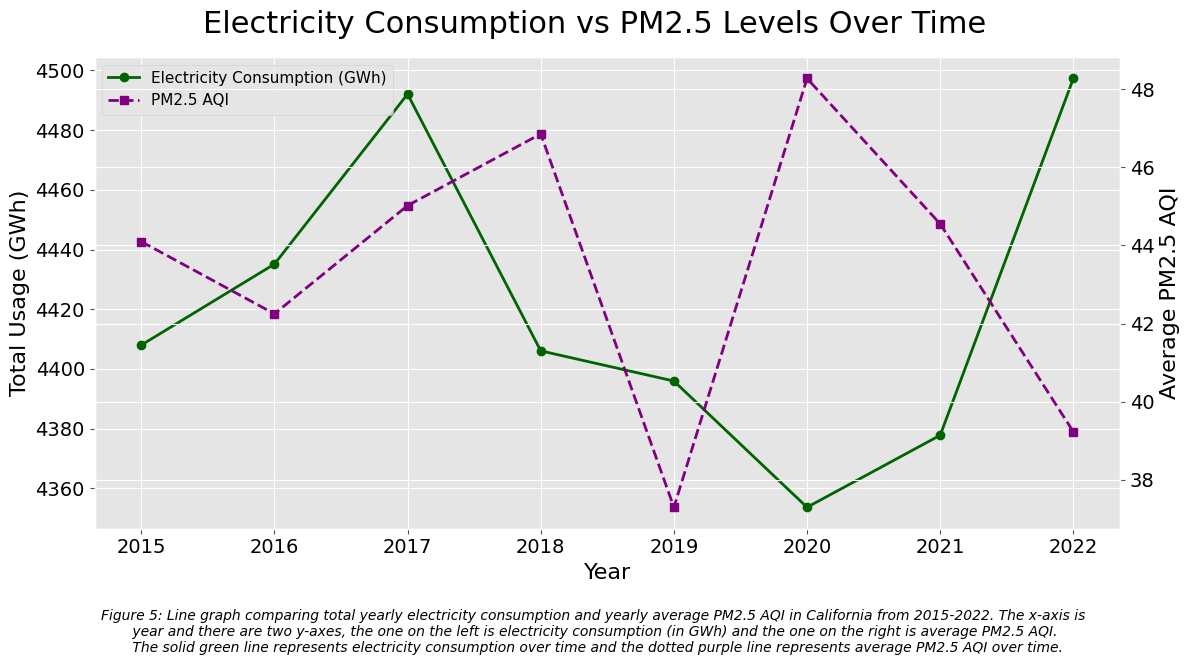

In [367]:
electricity_aggregated = electricity_data.groupby('year', as_index=False).agg({'total_usage': 'mean'})

# Aggregate PM2.5 data by year (mean values for PM2.5 AQI)
pm25_aggregated = pm25_data.groupby('year', as_index=False).agg({'daily_aqi_value': 'mean'})

# Merge datasets on 'year' column
merged_data = pd.merge(pm25_aggregated, electricity_aggregated, on='year', how='left')

merged_data = merged_data[~merged_data['year'].isin([2023, 2024])]

# Use a valid style for better aesthetics
plt.style.use('ggplot') 
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot electricity consumption
line1 = ax1.plot(
    merged_data['year'],
    merged_data['total_usage'],
    color='darkgreen',
    linewidth=2,
    marker='o',
    label='Electricity Consumption (GWh)'
)
ax1.set_xlabel('Year', color='black', fontsize=16)
ax1.set_ylabel('Total Usage (GWh)', color='black', fontsize=16)
ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
ax1.tick_params(axis='x', labelcolor='black', labelsize=14)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot PM2.5 levels
line2 = ax2.plot(
    merged_data['year'],
    merged_data['daily_aqi_value'],
    color='purple',
    linewidth=2,
    linestyle='--',
    marker='s',
    label='PM2.5 AQI'
)
ax2.set_ylabel('Average PM2.5 AQI', color='black', fontsize=16)
ax2.tick_params(axis='y', labelcolor='black', labelsize=14)

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11)

# Add title
fig.suptitle('Electricity Consumption vs PM2.5 Levels Over Time', fontsize=22)
fig.tight_layout()

# Add a caption below the plot
plt.figtext(
    0.5, -0.09,
    "Figure 5: Line graph comparing total yearly electricity consumption and yearly average PM2.5 AQI in California from 2015-2022. The x-axis is \n year and there are two y-axes, the one on the left is electricity consumption (in GWh) and the one on the right is average PM2.5 AQI. \n The solid green line represents electricity consumption over time and the dotted purple line represents average PM2.5 AQI over time.", 
    ha='center',
    fontsize=10,
    style='italic'
)

plt.savefig("electricity_vs_pm25.png", bbox_inches='tight')
plt.show()